In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.linalg import matmul

In [2]:
sns.set_style("whitegrid")

**Plotting Function**

In [3]:
def plot(X, title=""):
    h, w = 5, 5
    f = plt.figure(figsize=(6, 6))
    gs = f.add_gridspec(h, w)
    f.suptitle(title, fontsize=20)

    for i in range(h):
        for j in range(w):
            ax = f.add_subplot(gs[i, j])
            plt.imshow(X[i*h+j].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    f.tight_layout(rect=[0, 0.03, 1, 0.9])

**MNIST Dataset**

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [7]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [8]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

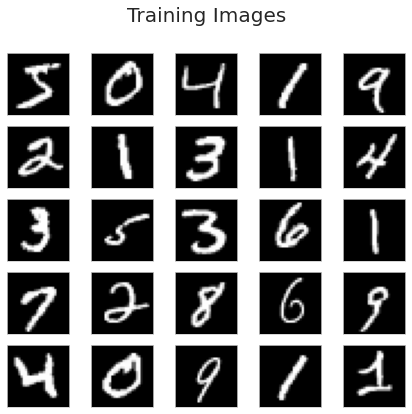

In [9]:
plot(X_train, "Training Images")

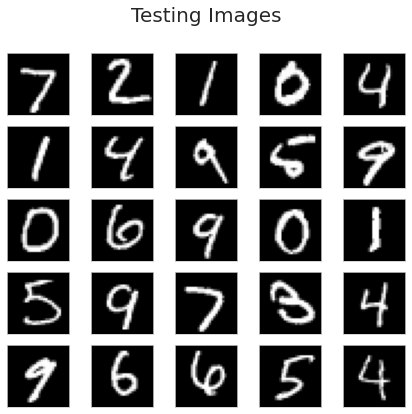

In [10]:
plot(X_test, "Testing Images")

## PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
n_dim=10

In [13]:
pca = PCA(n_components=n_dim)

In [14]:
X_pca = pca.fit(X_train)

In [15]:
X_test_pca = pca.transform(X_test)

In [16]:
X_test_pca = matmul(X_test_pca, pca.components_).numpy()

In [17]:
X_test.shape, X_test_pca.shape

((10000, 784), (10000, 784))

**Explained Variance**

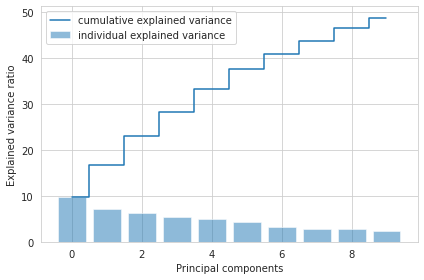

In [18]:
plt.figure(figsize=(6, 4))
plt.bar(range(n_dim), pca.explained_variance_ratio_*100, 
        alpha=0.5, align='center', label='individual explained variance')
plt.step(range(n_dim), np.cumsum(pca.explained_variance_ratio_*100), where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

**Reconstruction on Test Image**

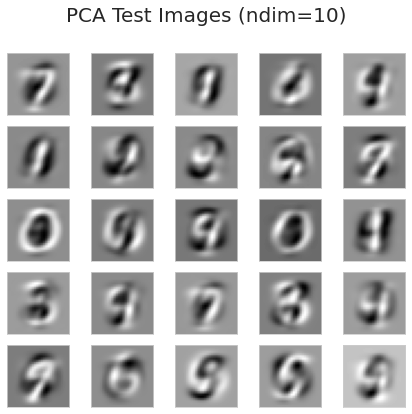

In [19]:
plot(X_test_pca, f"PCA Test Images (ndim={n_dim})")

## AutoEncoders

In [20]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [21]:
input_img = Input(shape=(784,))
encoded = Dense(n_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

In [22]:
autoencoder = Model(input_img, decoded)

In [23]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True)

Epoch 1/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6931
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6930
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6929
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6929
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6928
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6927
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6926
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6925
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6925
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6924
Epoch 11/50
235/235 [==============================] - 3s 13ms/step - loss: 0.6923
Epoch 12/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6922
Epoch 13/50
23

In [25]:
X_test_autoencoder = autoencoder.predict(X_test)

In [26]:
X_test.shape, X_test_autoencoder.shape

((10000, 784), (10000, 784))

**Reconstruction on Test Image**

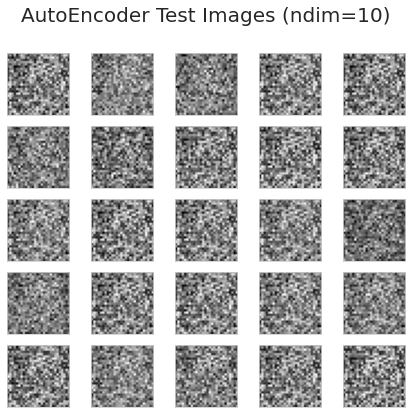

In [27]:
plot(X_test_autoencoder, f"AutoEncoder Test Images (ndim={n_dim})")